**Here is the code for automatic grouping of VA scan results.**


To begin, please upload the VA result and Index file intended for automatic grouping by following these steps

1.   Click the Upload button on the right side of the screen to select your file
2.   Once uploaded, you will see your file listed and ready to use




---



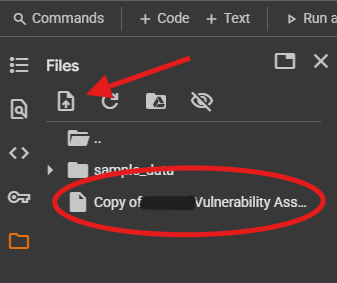



---




Please fill in the required information below

1.   filePath (The file path where you upload the VA and index file)


```
If you upload the file as described, it is usually located at
`/content/your_file_Here.xlsx`
```

2. sheet name (Specify the sheet name to group the data)

3. output (Specify the output path and the result sheet name)

4. patterns (A dictionary containing regex patterns for grouping)


```
The syntax follows the format below
'GroupNameResult': r'RegexPattern'
```








In [1]:
# import
import pandas as pd
import re
from google.colab import drive
from openpyxl import load_workbook
from openpyxl.styles import Font, Border, Alignment, PatternFill
from openpyxl.utils import get_column_letter
from openpyxl.styles import Alignment

# file Path Here
filePath = '/content/Result.xlsx'
indexAll = pd.read_excel('/content/Index All V2.xlsx')

# sheet name Here
df = pd.read_excel(filePath, sheet_name='Result', engine='openpyxl')

# output Path Here
outPutPath = '/content/Final.xlsx'
outPutSheetName='Final'

# patterns Here
patterns = {
    'Test EiEi': r'^Test.*',
    'Apache HTTP Server < 2.4.60 Multiple Vulnerability': r"Apache HTTP Server\s*(?:<=|>=|<|>|=|-)?\s*\d+\.\d+\.\d+.*Vulnerability\s*-\s*Windows|Apache HTTP Server.*Vulnerabilities\s*-\s*Windows",
    'OpenSSL Multiple Vulnerabilities': r'(?i)^OpenSSL:?\s*(?:\d+(?:\.\d+)*(?:[A-Za-z0-9]*)?(?:\s*<\s*\d+(?:\.\d+)*(?:[A-Za-z0-9]*)?)?(?:\s*,\s*\d+(?:\.\d+)*(?:[A-Za-z0-9]*)?(?:\s*<\s*\d+(?:\.\d+)*(?:[A-Za-z0-9]*)?)?)*|.+?)\s*-\s*Windows$',
    'PHP Multiple Vulnerabilities & End Of Life': r'^(?:PHP\s+)?(?P<versions>[\d.x, <]+)\s+(?P<title>.+?)\s*-?\s*(?P<platform>Windows)$|PHP Multiple Vulnerabilities \([A-Za-z]{3} \d{4}\) - Windows|PHP CVE-2019-13224 Use-After-Free Vulnerability - Windows|PHP End of Life \(EOL\) Detection - Windows|PHP Memory Disclosure Vulnerability - Windows|PHP Heap Use-After-Free Vulnerability \([A-Za-z]{3} \d{4}\) - Windows|PHP Multiple Heap Buffer Overflow and Information Disclosure Vulnerabilities \([A-Za-z]{3} \d{4}\) - Windows',
}

Once you have provided the required information and run the code

# **Code section**

In [2]:
df

,Ip,Vulnerability Name,Port,CVEs,Affected Versions,CVSS,Severity,Detection,Solution
0,1.1.1.1,TEST,1,cve-2020-020,V2,1.0,Low,this pc,delete
1,1.1.1.2,TEST,1,cve-2020-020,V2,1.0,Low,this pc,delete
2,1.1.1.2,TEST,1,cve-2020-020,V2,1.0,Low,this pc,delete
3,1.1.1.3,TEST,1,cve-2020-020,V2,1.0,Low,this pc,delete
4,1.1.1.3,TEST,1,cve-2020-020,V2,1.0,Low,this pc,delete
5,1.1.1.4,TEST LOG,1,cve-2020-020,V2,1.0,Log,this pc,delete
6,1.1.1.4,TEST LOG,1,cve-2020-020,V2,1.0,Log,this pc,delete
7,1.1.1.4,TEST LOG,1,cve-2020-020,V2,1.0,Log,this pc,delete
8,1.1.1.4,TEST LOG,1,cve-2020-020,V2,1.0,Log,this pc,delete
9,2.1.1.1,TEST,1,cve-2020-020,V2,1.0,High,this pc,delete


In [3]:
def customGroup(name, patternDict):
    for groupLabel, pattern in patternDict.items():
        if re.match(pattern, name):
            return groupLabel
    return name

def cveSort(cve):
    match = re.match(r'CVE-(\d+)-(\d+)', cve)
    if match:
        year, num = match.groups()
        return int(year), int(num)
    return (0, 0)

result = []

ipUnique = df['Ip'].unique()

for ip in ipUnique:
    ipData = df[df['Ip'] == ip].copy()

    groupedNames = []
    for vulnName in ipData['Vulnerability Name']:
        finalGroup = customGroup(str(vulnName), patterns)
        groupedNames.append(finalGroup)
    ipData['GroupedName'] = groupedNames

    for afterGroup in ipData['GroupedName'].unique():
        vulnRows = ipData[ipData['GroupedName'] == afterGroup]

        ports = sorted(set(vulnRows['Port'].dropna().astype(int)))
        finalPorts = ','.join(str(p) for p in ports)

        cveList = sorted(
            set(vulnRows['CVEs'].dropna().astype(str)),
            key=cveSort,
            reverse=True
        )
        cves = ','.join(cveList)

        affected = ','.join(sorted(set(vulnRows['Affected Versions'].dropna().astype(str))))

        cvss = str(vulnRows['CVSS'].dropna().astype(float).max())

        SeverSet = set(vulnRows['Severity'].dropna().astype(str))
        if 'High' in SeverSet:
            severity = 'High'
        elif 'Medium' in SeverSet:
            severity = 'Medium'
        elif 'Low' in SeverSet:
            severity = 'Low'
        elif 'Log' in SeverSet:
            severity = 'Log'
        else:
            severity = ''

        detection = ','.join(sorted(set(vulnRows['Detection'].dropna().astype(str))))
        solution = ','.join(sorted(set(vulnRows['Solution'].dropna().astype(str))))

        result.append({
            'Ip': ip,
            'Vulnerability Name': afterGroup,
            'Ports': finalPorts,
            'CVEs': cves,
            'Affected Versions': affected,
            'CVSS': cvss,
            'Severity': severity,
            'Detection': detection,
            'Solution': solution
        })

resultData = pd.DataFrame(result)


In [4]:
indexAllFinal = indexAll[['Vulnerability Name', 'References', 'Solution']]

resultData = resultData.merge(
    indexAllFinal,
    on='Vulnerability Name',
    how='left',
    suffixes=('', '_ref')
)

resultData['Solution'] = resultData['Solution_ref'].fillna(
    resultData['Solution']
)

resultData.drop(columns=['Solution_ref'], inplace=True)

In [5]:
resultData.to_excel(
    outPutPath,
    index=False,
    sheet_name=outPutSheetName
)

wb = load_workbook(outPutPath)
ws = wb[outPutSheetName]

header_font = Font(bold=True, name='Arial', size=10)
normal_font = Font(name='Arial', size=10)

no_border = Border()
left_align = Alignment(horizontal='left')

header_fill = PatternFill(
    start_color='8BC34A',
    end_color='8BC34A',
    fill_type='solid'
)

row_fill_1 = PatternFill(
    start_color='FFFFFF',
    end_color='FFFFFF',
    fill_type='solid'
)

row_fill_2 = PatternFill(
    start_color='EEF7E3',
    end_color='EEF7E3',
    fill_type='solid'
)

for row in ws.iter_rows():
    for cell in row:
        cell.font = normal_font
        cell.border = no_border
        cell.alignment = left_align

for cell in ws[1]:
    cell.font = header_font
    cell.fill = header_fill

last_col = get_column_letter(ws.max_column)
last_row = ws.max_row
ws.auto_filter.ref = f"A1:{last_col}{last_row}"

column_widths = {
    'A': 14.5,
    'B': 57,
    'C': 6.45,
    'D': 27.6,
    'E': 14.4,
    'F': 14.5,
    'G': 11.5,
    'H': 14.2,
    'I': 35.2,
    'J':150
}

for col_letter, width in column_widths.items():
    ws.column_dimensions[col_letter].width = width

for row in ws.iter_rows():
    ws.row_dimensions[row[0].row].height = 15.75

for row in ws.iter_rows(min_row=2):
    row_num = row[0].row
    fill = row_fill_2 if row_num % 2 == 0 else row_fill_1

    for cell in row:
        cell.fill = fill

right_align = Alignment(horizontal='right')

for col_letter in ['C', 'F']:
    for cell in ws[col_letter]:
        if cell.row != 1:
            cell.alignment = right_align

wb.save(outPutPath)

# Once you run the code


---


The file will be saved to the specified output path. Download it for the next process.